In [1]:
include("test_func.jl")
using JLD2, PyPlot, Printf, AverageShiftedHistograms, Statistics, FASTX, Dates

import Plots

In [2]:
function findnearest(A::Vector{Float64}, val::Real)
    return findmin(abs.(A .- val))
end

function findnearest_ind(A::Vector{Float64}, val::Real)
    return (1:length(A))[sortperm(abs.(A .- val))]
end

function min_max_norm_rev(ref::Vector{Float64}, tar::Vector{T}) where T <: Real
    min_val, max_val = extrema(ref)
    return (tar .* (max_val - min_val)) .+ min_val
end

function min_max_norm_rev(ref::Vector{Float64}, tar::Real)
    min_val, max_val = extrema(ref)
    return (tar * (max_val - min_val)) + min_val
end

function get_amino_loc(L::Vector{String})
    return Vector{Int}(sort(collect(Set(map(x -> parse(Int, x[1:end-1]), L)))))
end

get_amino_loc (generic function with 1 method)

In [3]:
@load "AData/save_data.JLD2" pre_vector_b pre_vector_c
@load "AData/save_rawdata.JLD2" X refY Y refY1 Y1 L star_ind NumL

real_data_vector = collect(zip(min_max_norm_rev(refY, pre_vector_b), min_max_norm_rev(refY1, pre_vector_c)))
e_ind = findall(x -> x[1] ≥ x[2], real_data_vector)
@printf "Error : %.3f%% (%d / %d)" length(e_ind) / length(pre_vector_c) * 100 length(e_ind) length(pre_vector_c)

t_ind = findall(x -> x[1] < x[2], real_data_vector)
pre_vector_b, pre_vector_c = pre_vector_b[t_ind], pre_vector_c[t_ind]
final_ind = t_ind;

Error : 0.340% (94414 / 27751248)

In [4]:
sort_idx = sortperm(pre_vector_b)

pre_vector_b = pre_vector_b[sort_idx]
pre_vector_c = pre_vector_c[sort_idx]
final_ind = final_ind[sort_idx];

In [5]:
# fix_dif_vector_c = get_diff_vector(pre_vector_b); @save "AData/save_part_diff.jld2" fix_dif_vector_c
@load "AData/save_part_diff.jld2" fix_dif_vector_c

1-element Vector{Symbol}:
 :fix_dif_vector_c

In [6]:
max_ind = findmax(fix_dif_vector_c)[2]
ub, lb = get_diff_index(pre_vector_b, max_ind);
println(lb - ub + 1)

107057


In [7]:
println(extrema(min_max_norm_rev(refY, pre_vector_b[ub:lb])))
println(extrema(min_max_norm_rev(refY1, pre_vector_c[ub:lb])))

(422.408, 422.908)
(452.947, 514.392)


In [8]:
@load "AData/save_editmutseq.jld2" edit_mut_seq_vector

1-element Vector{Symbol}:
 :edit_mut_seq_vector

In [9]:
tar_len = 100
tar_em_vector =  min_max_norm_rev(refY1, pre_vector_c[ub:lb])
tar_seq_vector = Vector{Vector{String}}()
for tar in 460:10:510
    temp_ind = findnearest_ind(tar_em_vector, tar)[1:tar_len]
    push!(tar_seq_vector, collect(Set(edit_mut_seq_vector[temp_ind .+ ub])))
end

In [10]:
open(FASTA.Writer, "AData/EmSet/merge1.fasta") do io
    for (i, (tar, data)) in enumerate(zip(460:10:510, tar_seq_vector))
        for (ind, seq) in enumerate(data)
            write(io, FASTA.Record(('A' + i - 1) * string(ind), seq))
        end
    end
end

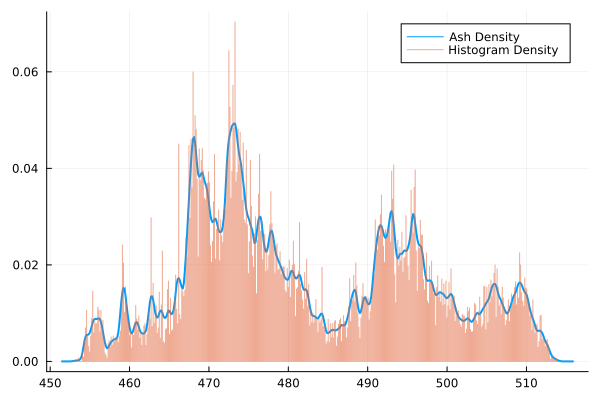

In [11]:
display(Plots.plot(ash(min_max_norm_rev(refY1, pre_vector_c[ub:lb]))))

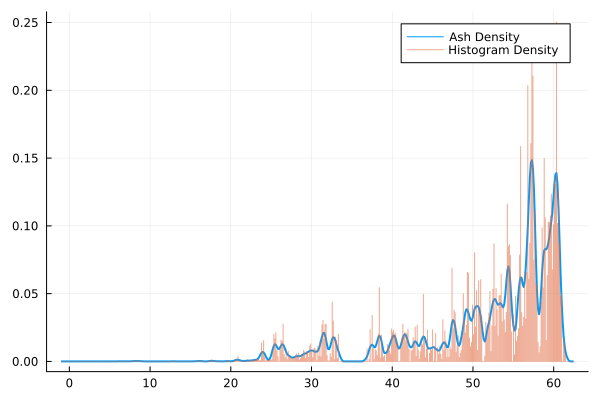

In [12]:
display(Plots.plot(ash(fix_dif_vector_c .* -(-(extrema(refY1)...)))))

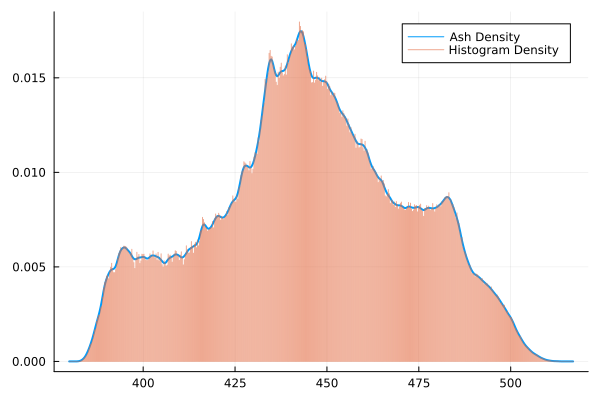

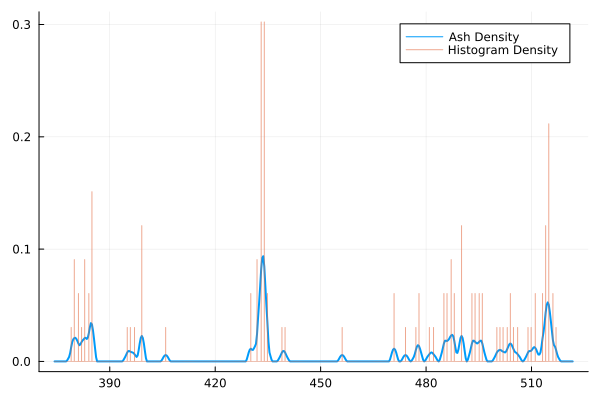

In [13]:
display(Plots.plot(ash(min_max_norm_rev(refY, pre_vector_b))))
display(Plots.plot(ash(refY)))

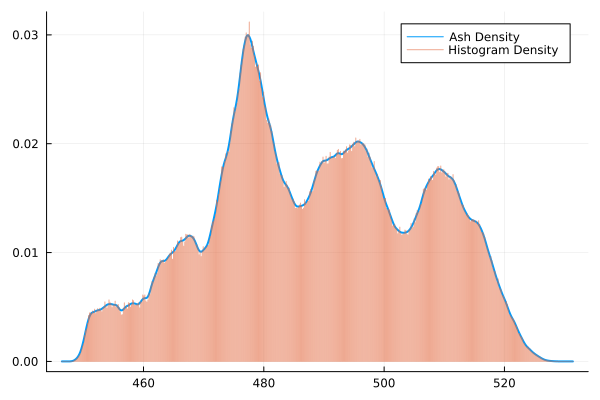

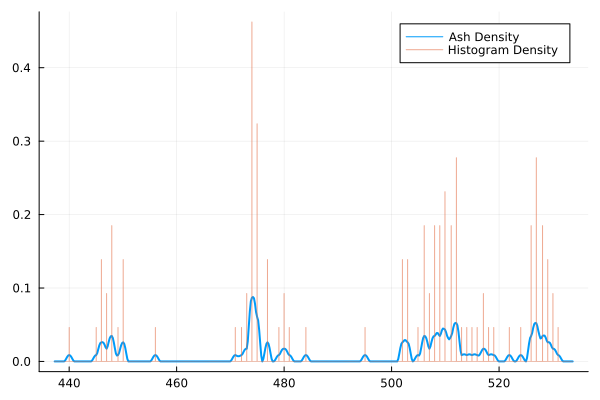

In [14]:
display(Plots.plot(ash(min_max_norm_rev(refY1, pre_vector_c))))
display(Plots.plot(ash(refY1)))

In [ ]:
@load "AData/save_editmutseq.jld2" edit_mut_seq_vector